#### Importing Libraries and Data

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import pandas as pd
df=pd.read_csv('/content/Social_Network_Ads.csv')
pd.set_option("display.max_columns",None)
df.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


#### General information of Dataset

In [42]:
df.info()  # General information about Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


All column datatypes are correct

### Drop 'User ID' Column

In [43]:
df=df.drop('User ID', axis=1)  # Removing 'User ID Column' (not useful feature)
df.columns                     # Checking whether 'User ID' Column is removed

Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

### Checking Missing Values

In [44]:
df.isnull().sum()

,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


No missing values were found

### Duplicates

In [45]:
df.duplicated().sum()     # sum of all duplicate rows

20

In [46]:
df[df.duplicated(keep=False)]  # Show all duplicate rows

,Gender,Age,EstimatedSalary,Purchased
13,Male,32,18000,0
26,Male,49,28000,1
28,Male,29,43000,0
52,Female,29,83000,0
74,Male,32,18000,0
81,Male,39,42000,0
94,Female,29,83000,0
112,Male,38,61000,0
115,Male,40,57000,0
116,Male,35,75000,0


In [47]:
df = df.drop_duplicates() # delete duplicates rows

In [48]:
df.duplicated().sum()  # Checking again to confirm there are no duplicates

0

20 Duplicate rows found and removed

#### Individual Columns Value Check to detect data inconsistencies

In [53]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [54]:
df['Age'].unique()

array([19, 35, 26, 27, 32, 25, 20, 18, 29, 47, 45, 46, 48, 49, 31, 21, 28,
       33, 30, 23, 24, 22, 59, 34, 39, 38, 37, 42, 40, 36, 41, 58, 55, 52,
       60, 56, 53, 50, 51, 57, 44, 43, 54])

In [55]:
df['Purchased'].unique()

array([0, 1])

In [56]:
df['EstimatedSalary'].unique()

array([ 19000,  20000,  43000,  57000,  76000,  58000,  84000, 150000,
        33000,  65000,  80000,  52000,  86000,  18000,  82000,  25000,
        26000,  28000,  29000,  22000,  49000,  41000,  23000,  30000,
        74000, 137000,  16000,  44000,  90000,  27000,  72000,  31000,
        17000,  51000, 108000,  15000,  79000,  54000, 135000,  89000,
        32000,  83000,  55000,  48000, 117000,  87000,  66000, 120000,
        63000,  68000, 113000, 112000,  42000,  88000,  62000, 118000,
        85000,  81000,  50000, 116000, 123000,  73000,  37000,  59000,
       149000,  21000,  35000,  71000,  61000,  75000,  53000, 107000,
        96000,  45000,  47000, 100000,  38000,  69000, 148000, 115000,
        34000,  60000,  70000,  36000,  39000, 134000, 101000, 130000,
       114000, 142000,  78000, 143000,  91000, 144000, 102000, 126000,
       133000, 147000, 104000, 146000, 122000,  97000,  95000, 131000,
        77000, 125000, 106000, 141000,  93000, 138000, 119000, 105000,
      

No inconsistent data was found

### Outliers

In [57]:
def detect_outliers_iqr(data, column_name):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    print(f"\n Column :{column_name}")
    print(f"Number of Outliers: {len(outliers)}")
    print(f"Outlier Values with Counts:")
    print(outliers.value_counts().sort_index())  # Count and sort outlier values
    print(f"min: {lower_bound}, max:{upper_bound}")
    return outliers

# List of columns to check for outliers (Continious numeric columns)
continious_numeric_col = ['Age','EstimatedSalary']
# Loop through the columns and detect outliers
for col in continious_numeric_col:
    outliers = detect_outliers_iqr(df[col], col)


 Column :Age
Number of Outliers: 0
Outlier Values with Counts:
Series([], Name: count, dtype: int64)
min: 3.5, max:71.5

 Column :EstimatedSalary
Number of Outliers: 0
Outlier Values with Counts:
Series([], Name: count, dtype: int64)
min: -24500.0, max:155500.0


No outliers were found

### Visualization: Histogram, Box Plot, Count Plot, Heatmap

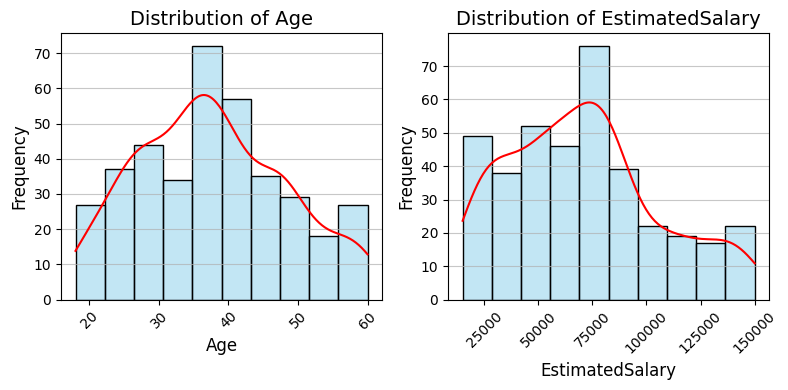

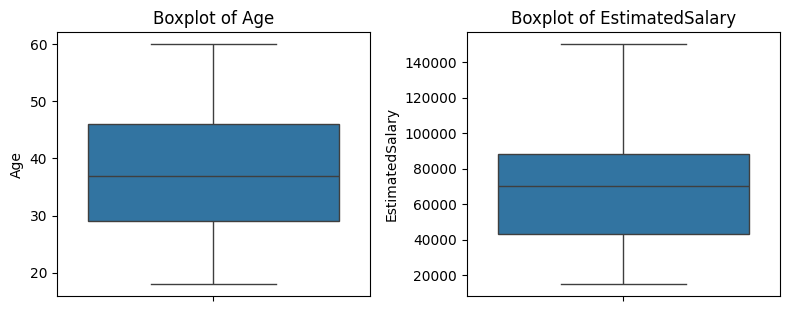

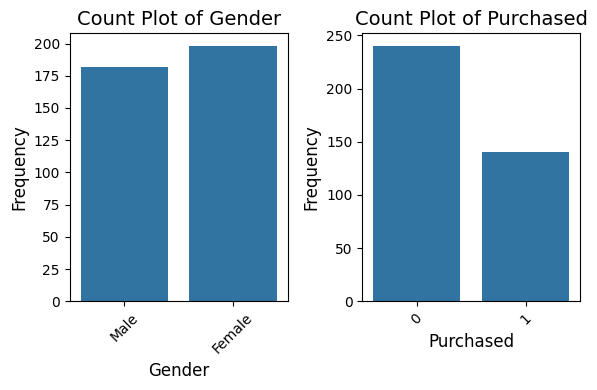

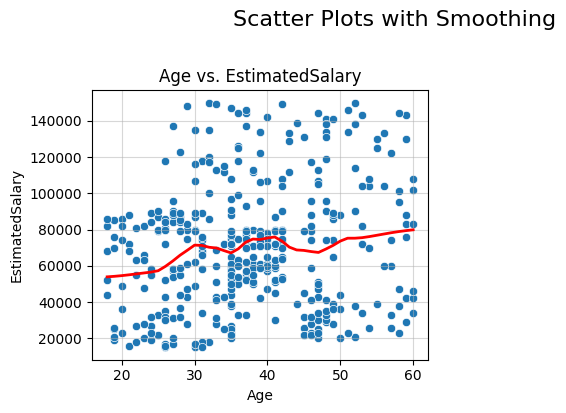

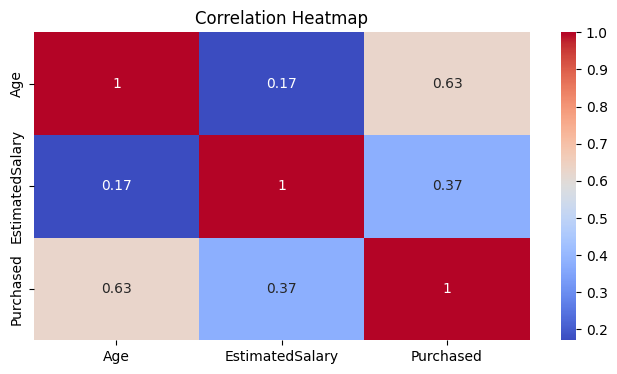

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
!pip install statsmodels
import statsmodels.api as sm
import itertools

continious_numeric_col = ['Age','EstimatedSalary']

categorical_col = ['Gender','Purchased']

#------------------------------------------------------------------------------------------------------------

# Histogram

# Create a figure and axes for the subplots
fig, axes = plt.subplots(1, 2, figsize=(8, 4))  # 1 rows, 2 columns of plots

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through columns and create histograms with KDE
for i, column in enumerate(continious_numeric_col):
    ax = axes[i]  # Get the current subplot

    # Plot histogram with KDE
    sns.histplot(df[column].dropna(), kde=True, bins=10, color='skyblue', edgecolor='black', ax=ax)

    # Access the KDE line and change its color
    kde_line = ax.lines[0]
    kde_line.set_color('red')

    # Formatting and labeling
    ax.set_title(f'Distribution of {column}', fontsize=14)
    ax.set_xlabel(column, fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis='y', alpha=0.7)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

#--------------------------------------------------------------------------------------

# Box Plot

plt.figure(figsize=(8, 6))
for i, col in enumerate(continious_numeric_col):
    plt.subplot(2, 2, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


#---------------------------------------------------------------------------------------

#Count Plot

# Create a figure and axes for the subplots
fig, axes = plt.subplots(1, 2, figsize=(6, 4))  # 1 rows, 2 columns of plots

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through columns and create count plots
for i, column in enumerate(categorical_col):
    ax = axes[i]  # Get the current subplot
    sns.countplot(x=column, data=df, ax=ax)  # Create the count plot

    # Formatting and labeling
    ax.set_title(f'Count Plot of {column}', fontsize=14)  # Set title
    ax.set_xlabel(column, fontsize=12)  # Set x-axis label
    ax.set_ylabel('Frequency', fontsize=12)  # Set y-axis label
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Adjust spacing between subplots
plt.tight_layout()

# Remove the empty subplot (if any)
if len(categorical_col) < len(axes):
    fig.delaxes(axes[-1])  # Remove the last subplot if it's empty

# Show the plot
plt.show()

#-----------------------------------------------------------------------------------------------------------

# Scatter Plots with Smoothing:

# Generate all unique pairs of columns for scatter plots
column_pairs = list(itertools.combinations(continious_numeric_col, 2))

# Create a figure and axes for the subplots
num_plots = len(column_pairs)
num_cols = 2  #  adjust this for desired layout
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate rows based on columns

fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 4))
fig.suptitle('Scatter Plots with Smoothing', fontsize=16, y=1.02)
axes = axes.flatten()

for i, (col1, col2) in enumerate(column_pairs):
    ax = axes[i]
    sns.scatterplot(x=df[col1], y=df[col2], ax=ax)

    # Add smoothing using LOESS (lowess) from statsmodels
    lowess = sm.nonparametric.lowess(df[col2], df[col1], frac=0.3)  # Adjust 'frac' for smoothness
    ax.plot(lowess[:, 0], lowess[:, 1], color='red', linewidth=2)

    ax.set_title(f'{col1} vs. {col2}', fontsize=12)
    ax.set_xlabel(col1, fontsize=10)
    ax.set_ylabel(col2, fontsize=10)
    ax.grid(True, alpha=0.5)

# Remove any empty subplots
for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#--------------------------------------------------------------------------------------------------------------

# Heatmap

# correlation  between any two variables'coolwarm'
plt.figure(figsize=(8, 4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()


*   There is high correlation between Age and Purchased
*   There is weak correlation between Estimated Salary and  Purchased
*   There is very weak correlation between Estimated Salary and Age




### Encoding

#### One Hot Encoding

In [59]:
# Select the categorical columns for encoding
categorical_cols_onehot = ['Gender']

# Apply one-hot encoding to the selected columns
df = pd.get_dummies(df, columns=categorical_cols_onehot,drop_first=True) # also drop first column as more columns are created

# Display the first few rows of the new DataFrame with encoded columns
pd.set_option("display.max_columns",None)
df.head(3)

,Age,EstimatedSalary,Purchased,Gender_Male
0,19,19000,0,True
1,35,20000,0,True
2,26,43000,0,False


#### Label Encoding

As Target Column already contain numeric 0 and 1 only encoding is not needed, but its done here.

In [61]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder to the 'Purchased' column and transform it
df['Purchased'] = label_encoder.fit_transform(df['Purchased'])

df['Purchased'].unique()   # Check Value

array([0, 1])

In [63]:
df.head(3)  # Checking Dataset

,Age,EstimatedSalary,Purchased,Gender_Male
0,19,19000,0,True
1,35,20000,0,True
2,26,43000,0,False


#### Target Variable

In [64]:
y = df['Purchased']

#### Features (Independent Variables)

In [67]:
X = df.drop('Purchased',axis=1)  # Dropping target variable from our dataframe
X.head(3)

,Age,EstimatedSalary,Gender_Male
0,19,19000,True
1,35,20000,True
2,26,43000,False


In [68]:
X.shape   # Check Dataset rows and columns

(380, 3)

### Splitting and Normalizing Data

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=700)  #splitting Data as Train and Test

X_train.shape, X_test.shape, y_train.shape, y_test.shape    # Check shape of Train and Test Data

((285, 3), (95, 3), (285,), (95,))

In [70]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Naive Bayes

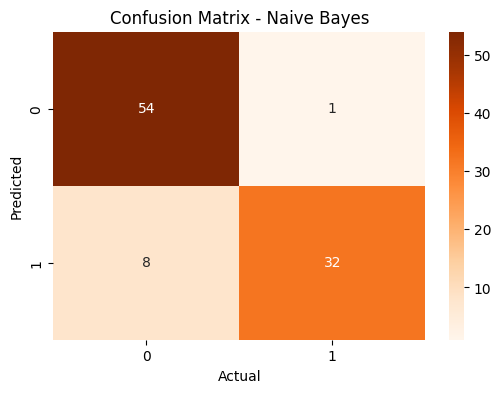

GaussianNB
Accuracy: 0.91

📋 Classification Report:GaussianNB
              precision    recall  f1-score   support

           0       0.87      0.98      0.92        55
           1       0.97      0.80      0.88        40

    accuracy                           0.91        95
   macro avg       0.92      0.89      0.90        95
weighted avg       0.91      0.91      0.90        95



In [80]:
#Initialize and train the Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report
#  Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

 #Classification Report
from sklearn.metrics import classification_report, accuracy_score
print("GaussianNB")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\n📋 Classification Report:GaussianNB")
print(classification_report(y_test, y_pred))

### KNN

#### KNN (k=3)

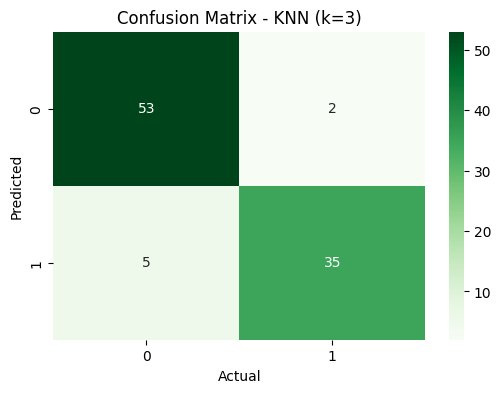

KNN (k=3)
Accuracy: 0.93

📋 Classification Report:
Accuracy: 0.9263157894736842
              precision    recall  f1-score   support

           0       0.91      0.96      0.94        55
           1       0.95      0.88      0.91        40

    accuracy                           0.93        95
   macro avg       0.93      0.92      0.92        95
weighted avg       0.93      0.93      0.93        95



In [72]:
from sklearn.neighbors import KNeighborsClassifier
# Train KNN classifier
k = 3  # we can experiment with different values
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = knn.predict(X_test_scaled)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Confusion Matrix - KNN (k={k})')
plt.show()

# Classification Report
print("KNN (k=3)")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\n📋 Classification Report:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

#### KNN (k=5)

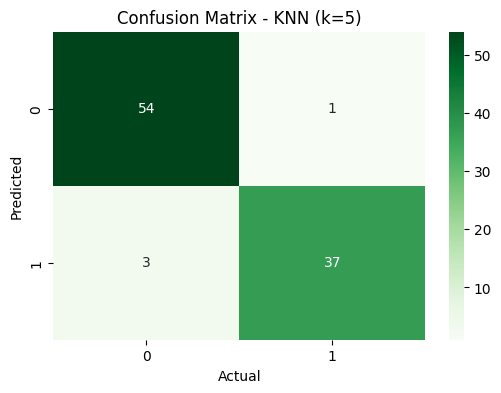

KNN (k=5)
Accuracy: 0.96

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.97      0.93      0.95        40

    accuracy                           0.96        95
   macro avg       0.96      0.95      0.96        95
weighted avg       0.96      0.96      0.96        95



In [73]:
from sklearn.neighbors import KNeighborsClassifier
# Train KNN classifier
k = 5  # we can experiment with different values
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = knn.predict(X_test_scaled)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Confusion Matrix - KNN (k={k})')
plt.show()

# Classification Report
print("KNN (k=5)")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred))

#### KNN (k=7)

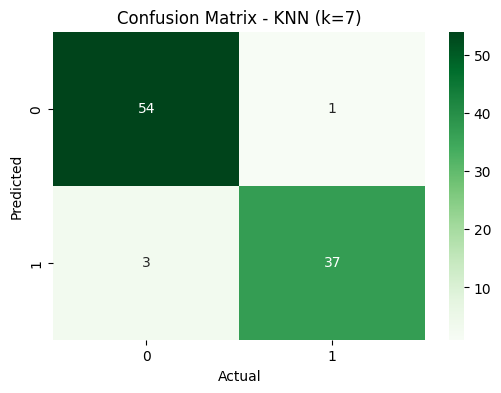

KNN (k=7)
Accuracy: 0.96

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.97      0.93      0.95        40

    accuracy                           0.96        95
   macro avg       0.96      0.95      0.96        95
weighted avg       0.96      0.96      0.96        95



In [74]:
from sklearn.neighbors import KNeighborsClassifier
# Train KNN classifier
k = 7  # we can experiment with different values
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = knn.predict(X_test_scaled)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Confusion Matrix - KNN (k={k})')
plt.show()

# Classification Report
print("KNN (k=7)")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred))

### Decision Tree

#### Decision Tree (Gini)

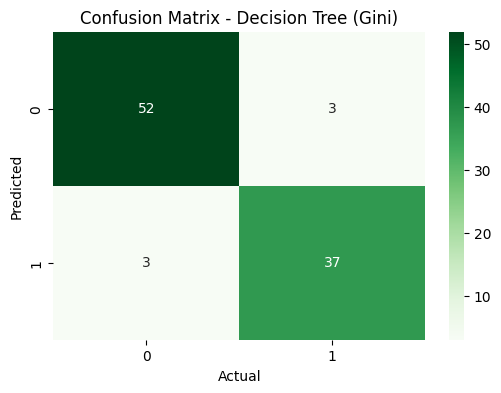

Decision Tree (Gini)
Accuracy: 0.94

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        55
           1       0.93      0.93      0.93        40

    accuracy                           0.94        95
   macro avg       0.94      0.94      0.94        95
weighted avg       0.94      0.94      0.94        95



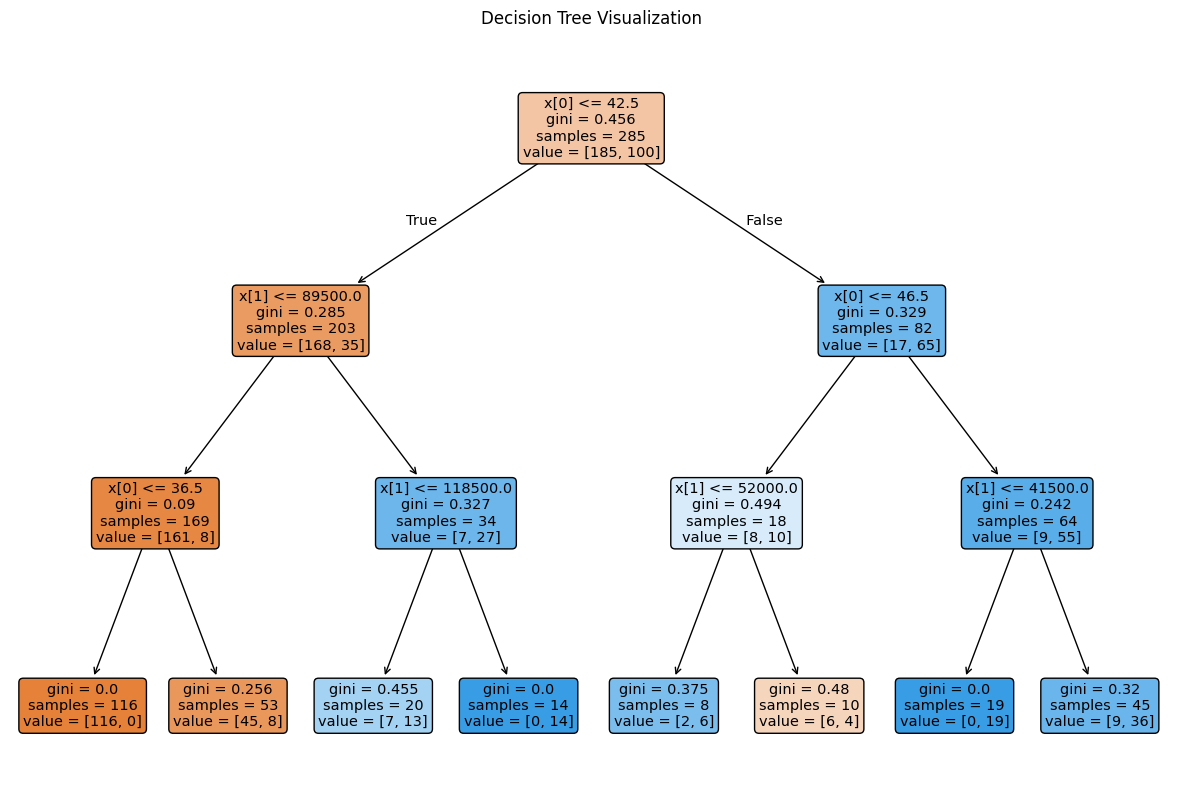

In [78]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score

# Train decision tree
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Confusion Matrix - Decision Tree (Gini)')
plt.show()

# Evaluate model
y_pred = clf.predict(X_test)
print("Decision Tree (Gini)")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Visualize decision tree
plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

#### Decision Tree (Entropy)

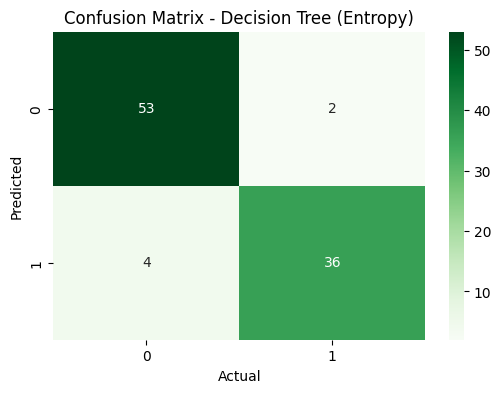

Decision Tree (Entropy)
Accuracy: 0.94

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95        55
           1       0.95      0.90      0.92        40

    accuracy                           0.94        95
   macro avg       0.94      0.93      0.93        95
weighted avg       0.94      0.94      0.94        95



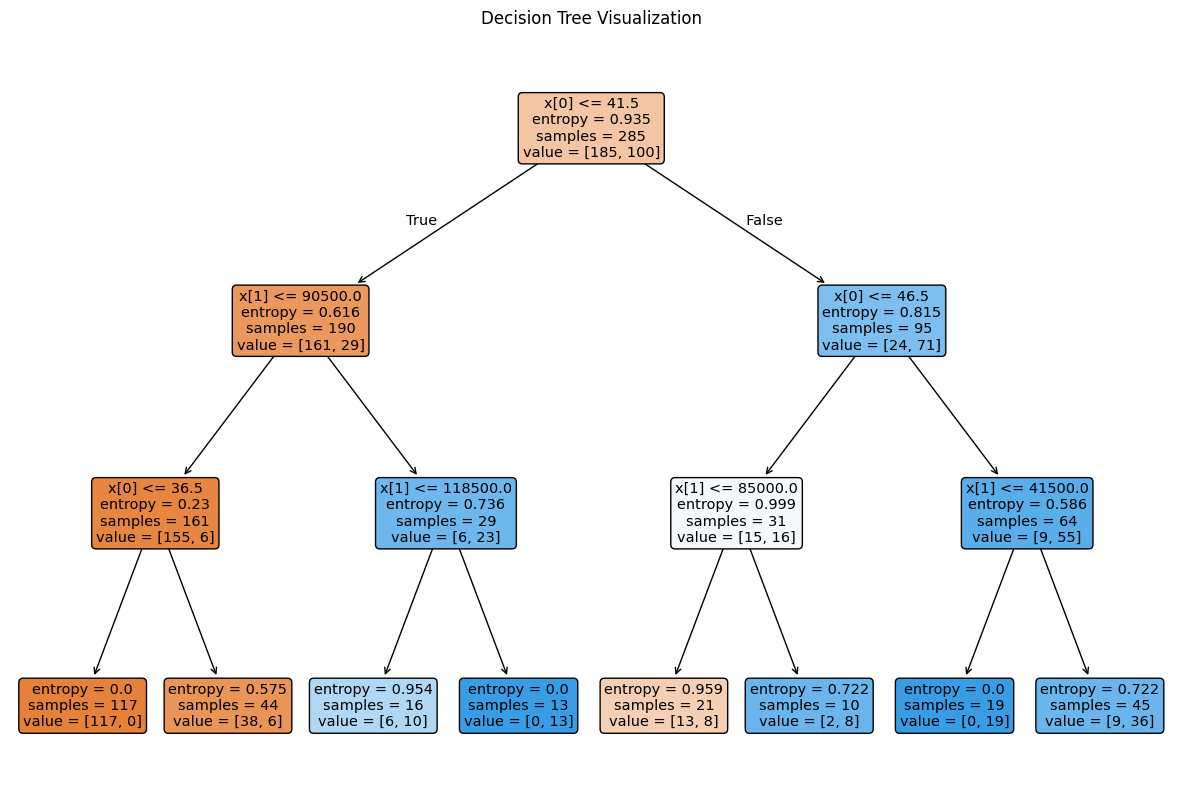

In [79]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score

clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

# Train the model on the training data
clf_entropy.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf_entropy.predict(X_test)

# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Confusion Matrix - Decision Tree (Entropy)')
plt.show()

# Evaluate the model
print("Decision Tree (Entropy)")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Visualize decision tree
plt.figure(figsize=(15, 10))
plot_tree(clf_entropy, filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

# Summary

We evaluated three classification models: Naive Bayes, K-Nearest Neighbors (KNN), and Decision Tree, to predict the 'Purchased' (Target variable). Below are the summarized results in table format.

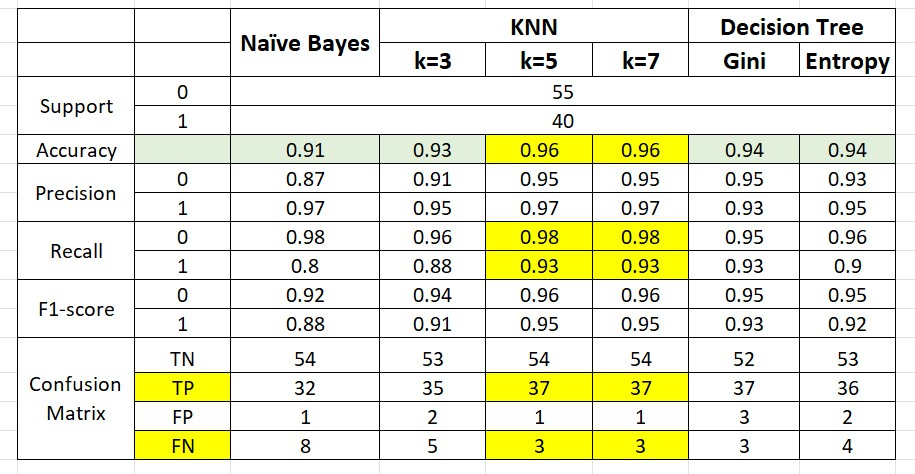

**Objective:** Predict whether a user purchases a product based on their age and
estimated salary

**Business Context:** In actual scenario, customer didnot purchased ads but the model predicts, the customer purchased it **(False Negative)**, so we will give more importance to **recall** in evaluation of the model.

**Accuracy:** The Naive Base model gives accuracy of 0.91, KNN give 0.93, 0.96, 0.96 for k=3, k=5 and k=7 respectively, and Decision Tree give 0.94, 0.94 respectively for Gini and Entropy.

Accuracy also depends on the support. In this dataset 57.8% belongs to '0' (Not Purchased and 42.1% belongs to '1' (Purchased), which is fairely right in real world.

Apart from accuracy we also need to look at precision, recall, f1-score and confusion matrix.

**Conclusion:**

In the business context, we give importance where actually product was not purchased, but model identified user purchased product. In confusion matrix we call it **False Negative** and its best representation can be done by **Recall**.

If we compare all three models with their different variations we see that **KNN (k=5 and k=7)** have same results, and it has **outperformed** it terms of **accuracy** (0.96), **recall** (0.98 and 0.93), **Precision** (0.95, 0.97), **f1-score** (0.96, 0.95) and **confusion matrix** (False Negative only 3).
